In [2]:
import os

def print_pastas_subpastas(caminho):
    for root, dirs, files in os.walk(caminho):
        # Imprime o diretório atual
        print(f"Diretório: {root}")
        # Imprime cada subdiretório dentro do diretório atual
        for dir in dirs:
            print(f"  Subdiretório: {dir}")

# Substitua 'seu/caminho/aqui' pelo caminho que você deseja listar
caminho = 'dataset/'
print_pastas_subpastas(caminho)

Diretório: dataset/
  Subdiretório: Shepherd’s Purse
  Subdiretório: Charlock
  Subdiretório: Common Chickweed
  Subdiretório: Sugar beet
  Subdiretório: Black-grass
  Subdiretório: Small-flowered Cranesbill
  Subdiretório: Cleavers
  Subdiretório: Maize
  Subdiretório: Common wheat
  Subdiretório: Fat Hen
  Subdiretório: Scentless Mayweed
  Subdiretório: Loose Silky-bent
Diretório: dataset/Shepherd’s Purse
Diretório: dataset/Charlock
Diretório: dataset/Common Chickweed
Diretório: dataset/Sugar beet
Diretório: dataset/Black-grass
Diretório: dataset/Small-flowered Cranesbill
Diretório: dataset/Cleavers
Diretório: dataset/Maize
Diretório: dataset/Common wheat
Diretório: dataset/Fat Hen
Diretório: dataset/Scentless Mayweed
Diretório: dataset/Loose Silky-bent


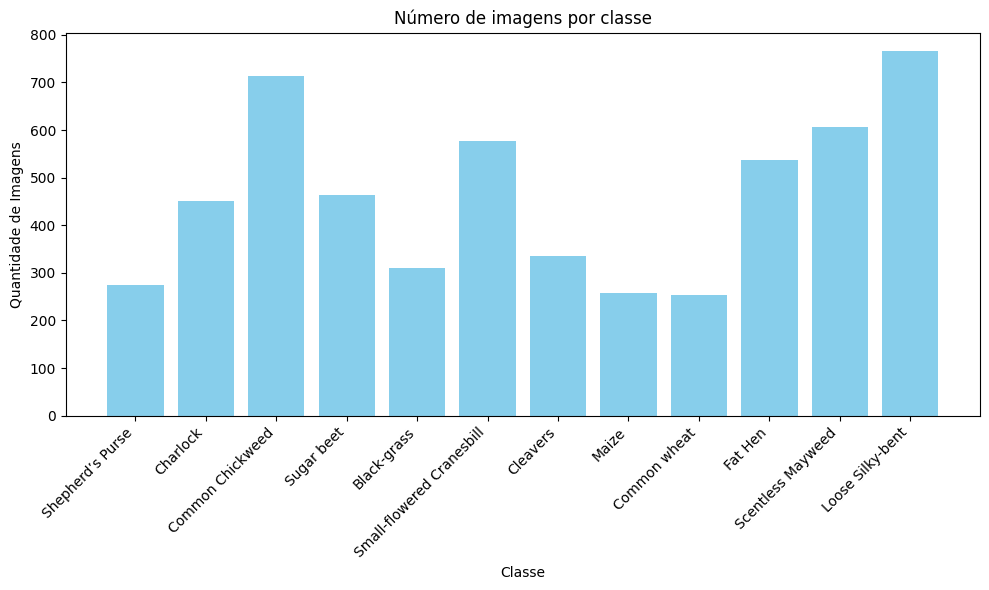

In [3]:
import os
import matplotlib.pyplot as plt

# Caminho do diretório principal
dataset_dir = 'dataset/'

# Inicializa o dicionário para armazenar a quantidade de imagens por classe
image_counts = {}

# Percorre cada subdiretório dentro do diretório principal
for subdirectory in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdirectory)
    
    # Verifica se é um diretório
    if os.path.isdir(subdir_path):
        # Conta o número de arquivos (imagens) no subdiretório
        num_images = len(os.listdir(subdir_path))
        
        # Adiciona a contagem ao dicionário
        image_counts[subdirectory] = num_images

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Imagens')
plt.title('Número de imagens por classe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [4]:
import os
import cv2
import numpy as np
from albumentations import (
    HorizontalFlip, VerticalFlip, ShiftScaleRotate, RandomBrightnessContrast, Compose
)

In [7]:
import os
import cv2
import numpy as np
from albumentations import (
    HorizontalFlip, VerticalFlip, ShiftScaleRotate, RandomBrightnessContrast, Compose
)

def augment_image(image):
    transform = Compose([
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.5),
        RandomBrightnessContrast(p=0.5),
    ])
    augmented = transform(image=image)
    return augmented['image']

def balance_dataset(input_directory, output_directory, target_count):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    for class_dir in os.listdir(input_directory):
        class_path = os.path.join(input_directory, class_dir)
        output_class_path = os.path.join(output_directory, class_dir)
        if not os.path.isdir(class_path):
            continue
        
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)
        
        images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
        current_count = len(images)
        
        # Copy original images to the new directory
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            output_img_path = os.path.join(output_class_path, img_name)
            image = cv2.imread(img_path)
            cv2.imwrite(output_img_path, image)
        
        # Only augment if current_count is less than target_count
        if current_count < target_count:
            while len(os.listdir(output_class_path)) < target_count:
                # Pick a random image to augment
                img_name = np.random.choice(images)
                img_path = os.path.join(class_path, img_name)
                image = cv2.imread(img_path)
                augmented_image = augment_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                augmented_img_name = f"aug_{len(os.listdir(output_class_path))}.jpg"
                augmented_img_path = os.path.join(output_class_path, augmented_img_name)
                cv2.imwrite(augmented_img_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

# Example usage:
# Set the target count to the desired number of images per class.
balance_dataset('dataset', 'dataset_balanceado', 800)

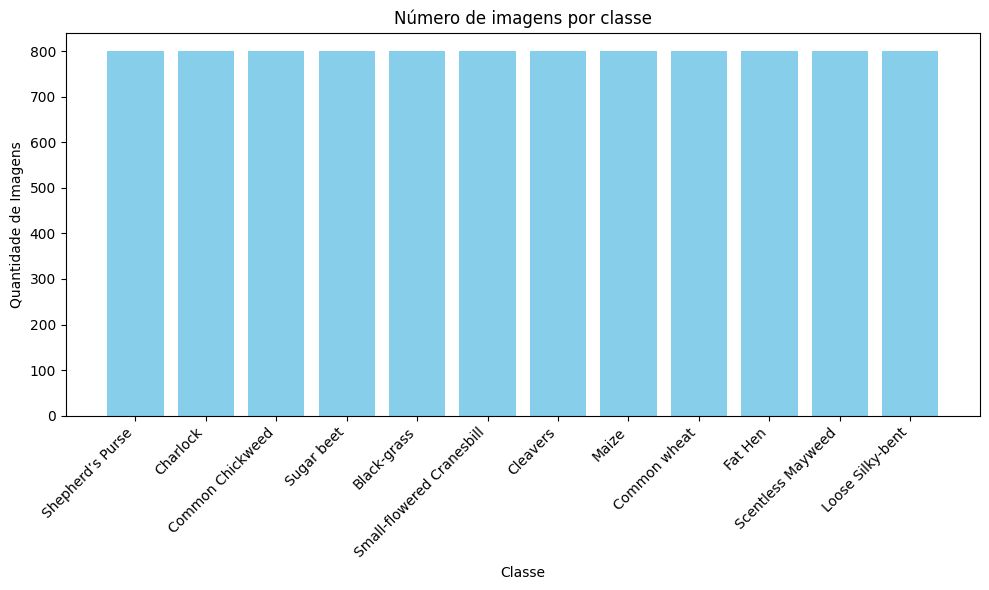

In [8]:
import os
import matplotlib.pyplot as plt

# Caminho do diretório principal
dataset_dir = 'dataset_balanceado/'

# Inicializa o dicionário para armazenar a quantidade de imagens por classe
image_counts = {}

# Percorre cada subdiretório dentro do diretório principal
for subdirectory in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdirectory)
    
    # Verifica se é um diretório
    if os.path.isdir(subdir_path):
        # Conta o número de arquivos (imagens) no subdiretório
        num_images = len(os.listdir(subdir_path))
        
        # Adiciona a contagem ao dicionário
        image_counts[subdirectory] = num_images

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Imagens')
plt.title('Número de imagens por classe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibe o gráfico
plt.show()